In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

In [2]:
# Initialize a 100x100 grid with all zeros
grid_size = 100
grid = np.zeros((grid_size, grid_size), dtype=int)


In [3]:

# BFS function to check if there's a path from start to goal
def is_path_available(grid):
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    start, goal = (0, 0), (grid_size - 1, grid_size - 1)
    visited = set()
    queue = deque([start])

    while queue:
        x, y = queue.popleft()
        if (x, y) == goal:
            return True
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < grid_size and 0 <= ny < grid_size and grid[nx, ny] == 0 and (nx, ny) not in visited:
                visited.add((nx, ny))
                queue.append((nx, ny))
    return False

# Function to place obstacles ensuring path availability
def place_obstacles_with_path(grid, num_obstacles):
    count = 0
    while count < num_obstacles:
        x, y = random.randint(0, grid_size - 1), random.randint(0, grid_size - 1)
        if (x, y) != (0, 0) and (x, y) != (grid_size - 1, grid_size - 1) and grid[x, y] == 0:
            grid[x, y] = 1
            if is_path_available(grid):
                count += 1
            else:
                grid[x, y] = 0


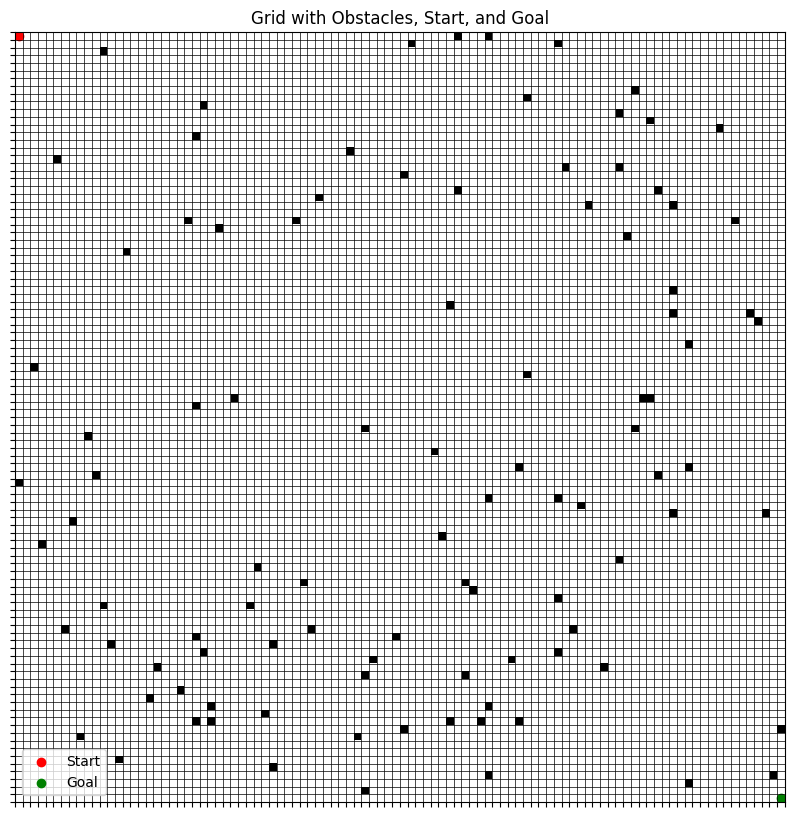

In [4]:

# Place 100 random obstacles in the grid, ensuring a path remains
num_obstacles = 100
place_obstacles_with_path(grid, num_obstacles)

# Plotting the grid with matplotlib and including grid lines
def display_grid(grid):
    plt.figure(figsize=(10, 10))
    plt.imshow(grid, cmap='gray_r')  # 'gray_r' reverses colors to make 1 (obstacles) black and 0 (space) white

    # Mark the start and goal positions
    plt.scatter(0, 0, color='red', label='Start')       # Start point in red
    plt.scatter(grid_size - 1, grid_size - 1, color='green', label='Goal')  # Goal point in green
    
    # Configure grid lines
    plt.grid(True, color='black', linewidth=0.5)  # Black grid lines
    plt.xticks(np.arange(-0.5, grid_size, 1), [])  # Set tick marks for grid
    plt.yticks(np.arange(-0.5, grid_size, 1), [])
    
    # Adding a legend, title, and hiding axis labels
    plt.legend(loc="lower left")
    plt.title("Grid with Obstacles, Start, and Goal")
    plt.show()

# Display the grid
display_grid(grid)

In [5]:
grid[:10,:10]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [7]:
# Grid dimensions
grid_size = 100
start = (0, 0)
goal = (99, 99)

# Actions
actions = [(-1, -1), (0, -1), (1, -1), (-1, 0), (1, 0), (-1, 1), (0, 1), (1, 1)]


### Value Iteration for Policy Optimization

In [8]:
gamma = 0.9    # Discount factor
theta = 1e-4   # Threshold for stopping criteria
reward_goal = 250
reward_obstacle = -20
reward_step = -1  # Small penalty per step to encourage minimal steps

# Reward function
def reward(x, y):
    if (x, y) == goal:
        return reward_goal
    elif grid[x, y] == 1:
        return reward_obstacle
    else:
        return reward_step

# Value Iteration
def value_iteration(grid, theta=theta, gamma=gamma):
    values = np.zeros((grid_size, grid_size))
    policy = np.zeros((grid_size, grid_size, len(actions)))

    while True:
        delta = 0
        for x in range(grid_size):
            for y in range(grid_size):
                if (x, y) == goal:
                    continue
                max_value = float('-inf')
                for i, (dx, dy) in enumerate(actions):
                    nx, ny = x + dx, y + dy
                    if 0 <= nx < grid_size and 0 <= ny < grid_size and grid[nx, ny] == 0:
                        v = reward(nx, ny) + gamma * values[nx, ny]
                        if v > max_value:
                            max_value = v
                            best_action = i
                delta = max(delta, abs(values[x, y] - max_value))
                values[x, y] = max_value
                policy[x, y] = np.eye(len(actions))[best_action]  # Update policy with best action
        if delta < theta:
            break
    return values, policy

# Compute optimal values and policy
values, policy = value_iteration(grid)


In [9]:
values

array([[ -9.99232671,  -9.99232671,  -9.99147412, ...,  -9.99147412,
         -9.99147412,  -9.99147412],
       [ -9.99147412,  -9.99147412,  -9.99147412, ...,  -9.9905268 ,
         -9.9905268 ,  -9.9905268 ],
       [ -9.99147412,  -9.9905268 ,  -9.9905268 , ...,  -9.98947422,
         -9.98947422,  -9.98947422],
       ...,
       [ -9.99147412,  -9.9905268 ,  -9.98947422, ..., 224.        ,
        224.        , 224.        ],
       [ -9.99147412,  -9.9905268 ,  -9.98947422, ..., 224.        ,
        250.        , 250.        ],
       [ -9.99147412,  -9.9905268 ,  -9.98947422, ..., 224.        ,
        250.        ,   0.        ]])

In [10]:
policy

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0.

In [13]:
# Function to get optimal path from start to goal using a policy
def get_optimal_path(policy, start, goal):
    path = []
    x, y = start
    while (x, y) != goal:
        path.append((x, y))
        action = np.argmax(policy[x, y])  # Select best action from policy
        dx, dy = actions[action]
        x, y = x + dx, y + dy
        if not (0 <= x < grid_size and 0 <= y < grid_size):
            break
        if grid[x, y] == 1:  # Stop if obstacle is hit (invalid path)
            break
    path.append(goal)
    return path

# Get optimal paths from both Value Iteration and Q-learning policies
vi_path = get_optimal_path(policy, start, goal)

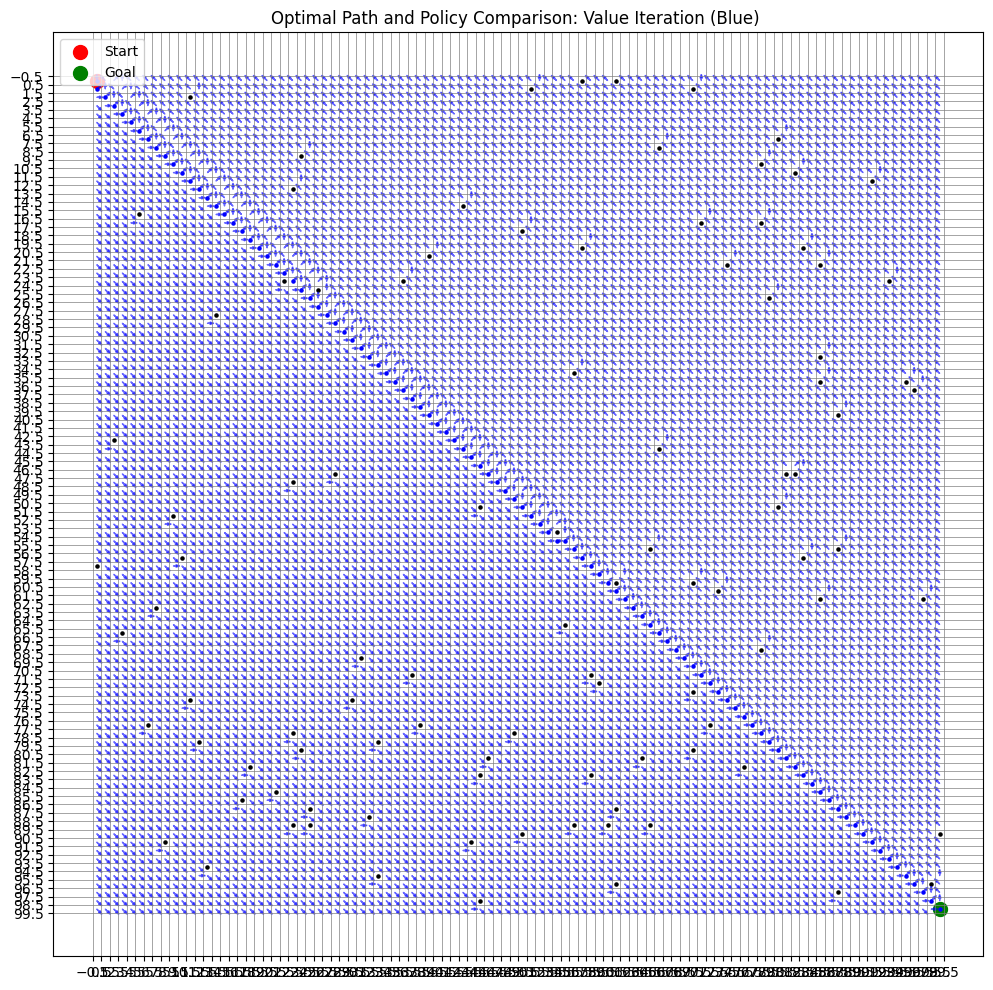

In [15]:
def plot_grid_with_values_and_policies(grid, vi_values, vi_policy,  vi_path, start, goal):
    plt.figure(figsize=(12, 12))
    
    # values_avg = (vi_values)

    # # Plot heatmap of the average values
    # plt.imshow(values_avg, cmap='coolwarm', interpolation='nearest', origin='upper')
    # plt.colorbar(label="State Value")

    # Plot obstacles, start, and goal
    for x in range(grid_size):
        for y in range(grid_size):
            if grid[x, y] == 1:  # Obstacle
                plt.scatter(y, x, color='black', s=5)
    
    # Mark the start and goal
    plt.scatter(start[1], start[0], color='red', s=100, label='Start')  # Start
    plt.scatter(goal[1], goal[0], color='green', s=100, label='Goal')  # Goal


    for (x, y) in vi_path:
        plt.scatter(y, x, color='blue', s=5)  # Value Iteration path

    # Plot arrows to indicate policies
    for x in range(grid_size):
        for y in range(grid_size):
            if (x, y) != goal and grid[x, y] == 0:
                vi_action = np.argmax(vi_policy[x, y])
                vi_dx, vi_dy = actions[vi_action]

                # Draw arrows: blue for Value Iteration
                plt.arrow(y, x, vi_dy * 0.3, vi_dx * -0.3, color='blue', head_width=0.3, alpha=0.6)
    # Display grid and legend
    plt.gca().set_xticks(np.arange(-0.5, grid_size, 1))
    plt.gca().set_yticks(np.arange(-0.5, grid_size, 1))
    plt.grid(True, color='gray', linewidth=0.5)
    plt.gca().invert_yaxis()  # Keep (0,0) at bottom-left for visualization
    plt.title("Optimal Path and Policy Comparison: Value Iteration (Blue) ")
    plt.legend(loc="upper left")
    plt.show()

# Plot grid with Value Iteration 
plot_grid_with_values_and_policies(grid, values, policy,  vi_path, start, goal)


### Q-Learning

In [12]:
# Parameters for Q-learning
alpha = 0.1      # Learning rate
epsilon = 0.1    # Exploration factor
num_episodes = 10

# Q-learning
def q_learning(grid, num_episodes=1000, alpha=alpha, gamma=gamma, epsilon=epsilon):
    q_table = np.zeros((grid_size, grid_size, len(actions)))

    for episode in range(num_episodes):
        x, y = start
        while (x, y) != goal:
            if random.uniform(0, 1) < epsilon:
                action_index = random.randint(0, len(actions) - 1)
            else:
                action_index = np.argmax(q_table[x, y])

            dx, dy = actions[action_index]
            nx, ny = x + dx, y + dy

            if 0 <= nx < grid_size and 0 <= ny < grid_size and grid[nx, ny] == 0:
                reward_value = reward(nx, ny)
                max_future_q = np.max(q_table[nx, ny])
                current_q = q_table[x, y, action_index]
                new_q = (1 - alpha) * current_q + alpha * (reward_value + gamma * max_future_q)
                q_table[x, y, action_index] = new_q
                x, y = nx, ny  # Move to the next state
    return q_table

# Train the Q-learning agent
q_table = q_learning(grid)

KeyboardInterrupt: 

Inference: Q-Learning approach is not suitable for a problem this big, It takes too much of computation time and doesn't even converges or completes execution of training

In [ ]:
q_table